In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Plan:
- make graphs from a .csv (a simpler version of speadsheet and akin to text file)
- use Python and `pandas` library to clean data, explore and make simple graph
- work with built-in function to discover statistics

# Before you start:
- this Jupyter notebook, code, and software were prepared using `Ubuntu 18.04LTS`, `Python3.6.9`
- If you are using Windows, or even a Mac, I recommend to jump on [Anaconda](https://www.anaconda.com/products/individual) suite. Scroll to the bottom of the page, you will see the package for your system. Select `Graphic` option to make your life a bit easier (for now).
- Alternatively, try [**Google Colaboratory**](https://colab.research.google.com/) that should have most of the packages available to you

# Prepare folder structure
- all data file is stored in `data` folder

In [ ]:
import os # to create folder, right click `Create Folder` works

In [ ]:
cd /content/drive/MyDrive/air-prediction

/content/drive/MyDrive/air-prediction


In [ ]:
# check again and a folder name data existed
os.listdir()

['img',
 'README.md',
 'data',
 'tmp',
 '1. Basic-data-visualize.ipynb',
 'graph',
 'LICENSE',
 '.gitignore',
 '.git',
 '2.1 Correlation of PM2.5 and time.ipynb',
 '2.1 Correlation of PM2.5 and time.pdf',
 '_config.yml',
 '1. Basic-data-visualize.html',
 'ref',
 '.ipynb_checkpoints',
 '1. Basic-data-visualize.pdf',
 '2.1 Correlation of PM2.5 and time.html']

# Download CSV files
- let work with `AirNow.gov`'s data archived by years and up-to-date.
![Maps](./img/airmonitors_location.png)

- Click to one location (**Hanoi**), a list of CSV files under *Historical* tab blow the map
```
2015 PM2.5 MTD
2015 PM2.5
2016 PM2.5 MTD
2016 PM2.5
2017 PM2.5 MTD
2017 PM2.5
2018 PM2.5 MTD
2018 PM2.5
2019 PM2.5 MTD
2019 PM2.5
2020 PM2.5 MTD
2020 PM2.5 YTD
```
- and the link to a file `http://dosairnowdata.org/dos/historical/Hanoi/2016/Hanoi_PM2.5_2016_12_MTD.csv`
- [Ref: Airnow.gov](https://www.airnow.gov/international/us-embassies-and-consulates/)

In [ ]:
# let get a file contained the whole year data. For Hanoi, I selected 2018. For 2019, only few months to the end of the yeear is availbe
# Right click and Save As `data` folder or
!wget http://dosairnowdata.org/dos/historical/Hanoi/2018/Hanoi_PM2.5_2018_YTD.csv -P ./data2/

--2025-12-01 11:48:01--  http://dosairnowdata.org/dos/historical/Hanoi/2018/Hanoi_PM2.5_2018_YTD.csv
Resolving dosairnowdata.org (dosairnowdata.org)... failed: Name or service not known.
wget: unable to resolve host address ‘dosairnowdata.org’


In [ ]:
# check to see if the file is in data
os.listdir('./data')

['Hanoi_PM2.5_2018_YTD.csv',
 'cleaned_Hanoi_PM2.5_2018_YTD.csv',
 'cleaned_hadong_noaa_isd_2018.csv',
 'cleaned_hadong_noaa_isd_2018_withRH.csv',
 'cleaned_noibai_noaa_isd_2018.csv',
 'cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
 'comb_PM25_Hanoi_2018.csv',
 'comb_PM25_Hanoi_2018_sm.csv',
 'comb_PM25_wind_Hanoi_2018.csv',
 'comb_PM25_wind_Hanoi_2018_v1.csv',
 'comb_PM25_wind_Hanoi_2018_v2.csv',
 'comb_PM25_wind_Hanoi_2018_v3.csv',
 'combined_meteo_PM2.5_Hanoi_2018.csv',
 'darksky_hanoi_2018.csv',
 'filled_PM2.5_Hanoi_2018.csv',
 'hadong_noaa_isd_2018.csv',
 'merra2_aer_hanoi_2018.csv',
 'merra2_flx_hanoi_2018.csv',
 'merra2_hanoi_2018_wind_converted.csv',
 'merra2_slv_hanoi_2018.csv',
 'merra2_slv_hanoi_2018_w_wind_RH.csv',
 'nc4',
 'noibai_noaa_isd_2018.csv',
 'reduced_noibai_noaa_isd_2018.csv']

## Why I downloaded the file?
- The file is available in your local drive, you can examine by text editor or Excel-liked program
- Reduce load on the server, especially when one first tries out the code unintentionally request one file multiple times
- Alternatively, a `csv` file can be read directly into a `DataFrame` (similar to a `Sheet`) by `pandas`
- and faster

# Explore file by Pandas
- [pandas](https://pandas.pydata.org/) Python Data Analysis Library is a must-have tool to work with tabular data
- Install library (on linux or Mac), assumed you have `pip` installed

```
pip install pandas --user# process tatular data
pip install matplotlib --user #powerful to make graph
pip install seaborn --user # make the graph look good

```

In [ ]:
# import pandas
import pandas as pd
# load the data in the memory
df = pd.read_csv('./data/Hanoi_PM2.5_2018_YTD.csv')

In [ ]:
# let see the first 5 row of the file
df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Hanoi,PM2.5 - Principal,2018-01-01 01:00 AM,2018,1,1,1,68.9,158,Unhealthy,69.2,UG/M3,1 Hr,Valid
1,Hanoi,PM2.5 - Principal,2018-01-01 02:00 AM,2018,1,1,2,72.2,160,Unhealthy,75.5,UG/M3,1 Hr,Valid
2,Hanoi,PM2.5 - Principal,2018-01-01 03:00 AM,2018,1,1,3,81.2,164,Unhealthy,90.2,UG/M3,1 Hr,Valid
3,Hanoi,PM2.5 - Principal,2018-01-01 04:00 AM,2018,1,1,4,89.4,169,Unhealthy,97.6,UG/M3,1 Hr,Valid
4,Hanoi,PM2.5 - Principal,2018-01-01 05:00 AM,2018,1,1,5,89.2,168,Unhealthy,89.1,UG/M3,1 Hr,Valid


In [ ]:
# `.info` can be handy for high-level summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           8339 non-null   object 
 1   Parameter      8339 non-null   object 
 2   Date (LT)      8339 non-null   object 
 3   Year           8339 non-null   int64  
 4   Month          8339 non-null   int64  
 5   Day            8339 non-null   int64  
 6   Hour           8339 non-null   int64  
 7   NowCast Conc.  8339 non-null   float64
 8   AQI            8339 non-null   int64  
 9   AQI Category   8100 non-null   object 
 10  Raw Conc.      8339 non-null   float64
 11  Conc. Unit     8339 non-null   object 
 12  Duration       8339 non-null   object 
 13  QC Name        8339 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 912.2+ KB


- there is many coluumns included for its completeness. such as `Site`, `Parameter`, `Conc.(entration) Unit`...
- Most columns contain 8339 rows, AQI Category has 8100 rows. The lesser row is resulted from the method to calculate AQI (Air Quality Index), a final number for public.
- Three important columns are `Date (LT)`, `Raw Conc.`, `QC Name`. Other columns are derived from these three columns.

In [ ]:
# to have a look at the distribution (statistic)
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000,8339.000000
mean,2018.000120,6.584123,15.971939,11.561338,10.679398,70.699125,22.647859
std,0.010951,3.485221,8.801531,6.907012,175.955430,188.781578,139.447799
min,2018.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2018.000000,4.000000,8.000000,6.000000,19.000000,66.000000,18.850000
50%,2018.000000,7.000000,16.000000,12.000000,31.300000,91.000000,31.700000
75%,2018.000000,10.000000,24.000000,18.000000,49.900000,136.000000,51.800000
max,2019.000000,12.000000,31.000000,23.000000,235.800000,286.000000,323.000000


- only numeric columns are listed here
- notice `-999` in Conc columns
- for summary statistics, this table is already overwhelming
- the mean (raw) concentration is `22 microgram/cubic meter`, did you spot what is wrong with this number?
- 50% label is called `median`, a value of concentration (for example) that devided the sample pool into two, so that 50 percent of the sample is smaller than the median (18.85), and 50% is larger the medium.
- the median is lower than the mean (average), why is that?

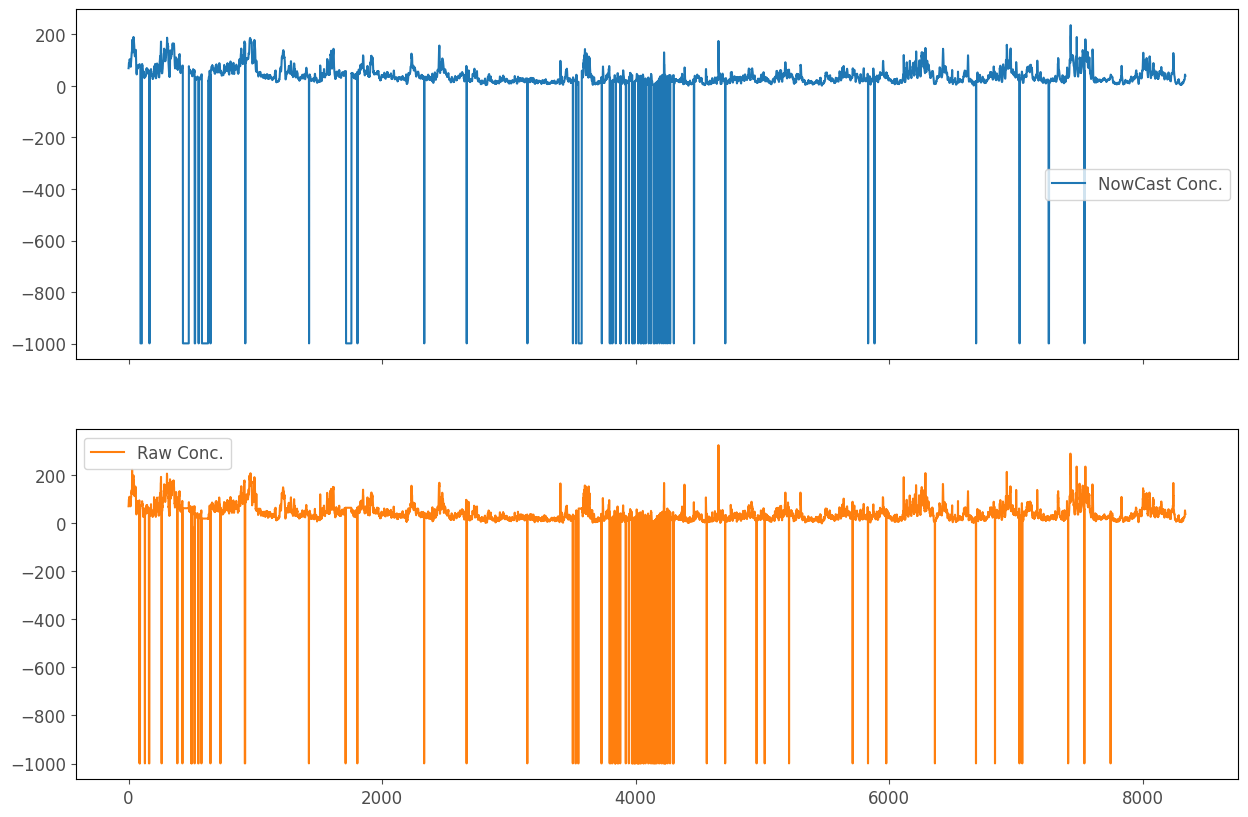

In [ ]:
# let visualize to concentration, use the .plot function from pandas,
# I used subplots=True to separate two graphs, and figsize=(15,6) indicate the size of the graph
df[['NowCast Conc.', 'Raw Conc.']].plot(subplots=True, figsize=(15,10));

- uhm, this is not really make the data is easier to see the trend,
- the `-999`s make the graph skewed and cannot see the trend.
- let make a quick fix by removing `-999` values

In [ ]:
df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

<Axes: >

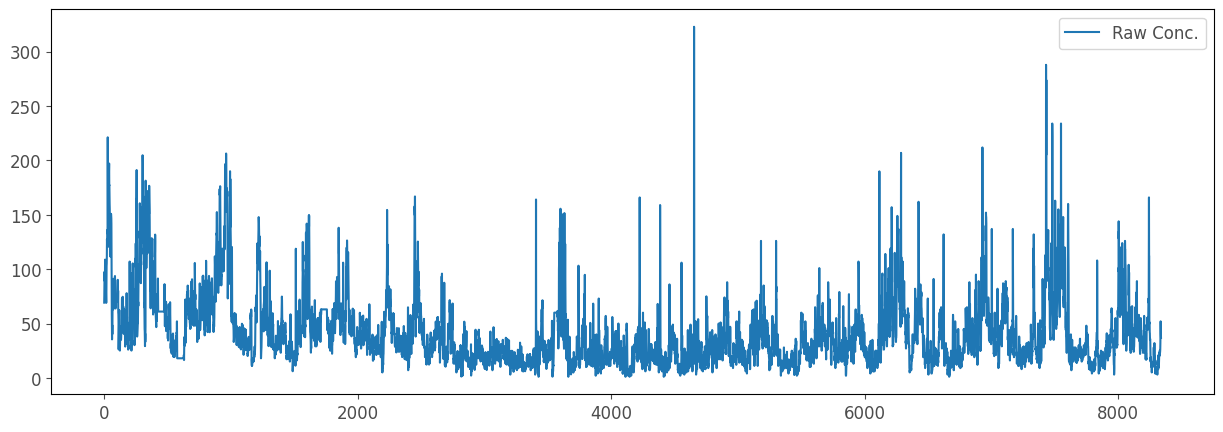

In [ ]:
# filter out negative values in Raw Conc column
df[df['Raw Conc.'] > 0]['Raw Conc.'].plot(figsize=(15,5), legend=True)

- this technique is called `filtering`
- first `df['Raw Conc.'] > 0` yields a maxtrix (table) with `False` or `True` value for each cell
- only cells with `True` value selected by `df[df['Raw Conc.']`
- Next the column `Raw Conc.` is selected by `df[df['Raw Conc.']['Raw Conc.']`
- finally, `plot` function is called to display to clean data

# Make data is more insightful


## Make the timeseries data
- convert a string represented date and time to a `datetime` object
- set the datetime as the index
- remove redundant columns

In [ ]:
# convert string to datetime and set this column as the index
df['Date (LT)'] = pd.to_datetime(df['Date (LT)'])
# set a column as the index
df.set_index('Date (LT)', inplace=True)
df.head()

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2018-01-01 01:00:00,Hanoi,PM2.5 - Principal,2018,1,1,1,68.9,158,Unhealthy,69.2,UG/M3,1 Hr,Valid
2018-01-01 02:00:00,Hanoi,PM2.5 - Principal,2018,1,1,2,72.2,160,Unhealthy,75.5,UG/M3,1 Hr,Valid
2018-01-01 03:00:00,Hanoi,PM2.5 - Principal,2018,1,1,3,81.2,164,Unhealthy,90.2,UG/M3,1 Hr,Valid
2018-01-01 04:00:00,Hanoi,PM2.5 - Principal,2018,1,1,4,89.4,169,Unhealthy,97.6,UG/M3,1 Hr,Valid
2018-01-01 05:00:00,Hanoi,PM2.5 - Principal,2018,1,1,5,89.2,168,Unhealthy,89.1,UG/M3,1 Hr,Valid


In [ ]:
# check data type, the index has `DatetimeIndex`
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8339 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           8339 non-null   object 
 1   Parameter      8339 non-null   object 
 2   Year           8339 non-null   int64  
 3   Month          8339 non-null   int64  
 4   Day            8339 non-null   int64  
 5   Hour           8339 non-null   int64  
 6   NowCast Conc.  8339 non-null   float64
 7   AQI            8339 non-null   int64  
 8   AQI Category   8100 non-null   object 
 9   Raw Conc.      8339 non-null   float64
 10  Conc. Unit     8339 non-null   object 
 11  Duration       8339 non-null   object 
 12  QC Name        8339 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 912.1+ KB


In [ ]:
# remove first 5 columns and two columns near the last one
# inplace=True specifies the change (remove columns) in df object
df.drop(columns=['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'Conc. Unit', 'Duration'], inplace=True)
df.head()

,NowCast Conc.,AQI,AQI Category,Raw Conc.,QC Name
Date (LT),,,,,
2018-01-01 01:00:00,68.9,158,Unhealthy,69.2,Valid
2018-01-01 02:00:00,72.2,160,Unhealthy,75.5,Valid
2018-01-01 03:00:00,81.2,164,Unhealthy,90.2,Valid
2018-01-01 04:00:00,89.4,169,Unhealthy,97.6,Valid
2018-01-01 05:00:00,89.2,168,Unhealthy,89.1,Valid


In [ ]:
# filter the data and assign the cleaned DataFrame to df2
df2 = df[df['Raw Conc.']>=0]
df2.describe()

,NowCast Conc.,AQI,Raw Conc.
count,8190.000000,8190.000000,8190.000000
mean,10.626288,70.710134,40.752259
std,176.425577,189.279538,31.456565
min,-999.000000,-999.000000,0.000000
25%,19.000000,66.000000,19.000000
50%,31.400000,92.000000,32.000000
75%,50.075000,137.000000,52.000000
max,235.800000,286.000000,323.000000


- `-999` values are removed from `Raw Conc.` columns, but some are still in the `AQI` and `NowCast Conc.`
- less rows in `df2` (8190) vs. 8339 in `df`
- the mean value for concentration is 40.7 (ug/m3), and the median is 32 (ug/m3) in cleaned version (in `df`, the mean value `22.6` (ug/m3)
- small mistakes could lead to an inaccurate results, and a wrong interpretation (ie. mean, median)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NowCast Conc.  8190 non-null   float64
 1   AQI            8190 non-null   int64  
 2   AQI Category   7954 non-null   object 
 3   Raw Conc.      8190 non-null   float64
 4   QC Name        8190 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 383.9+ KB


<Axes: xlabel='Date (LT)'>

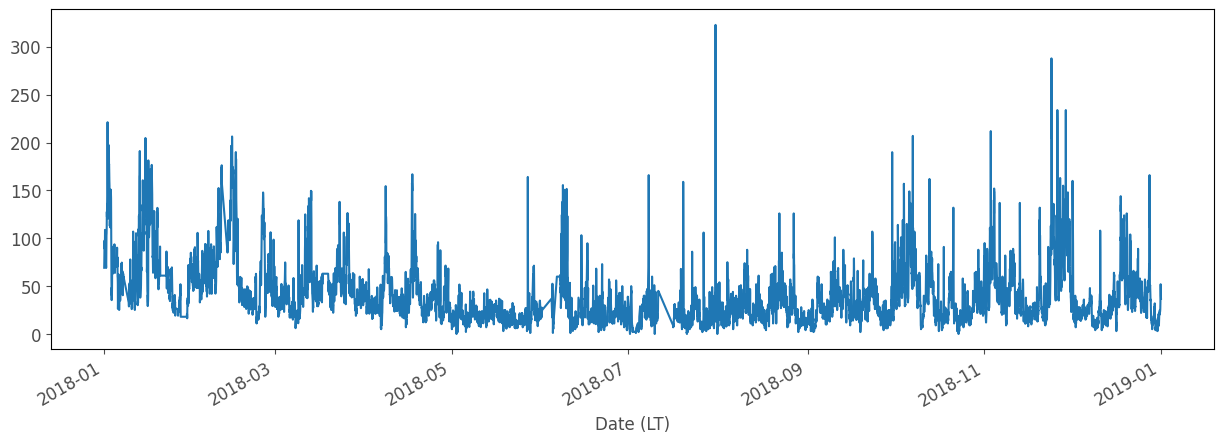

In [ ]:
# let see concentration in 2018 with timeseris
df2['Raw Conc.'].plot(figsize=(15,5))

<Axes: xlabel='Date (LT)'>

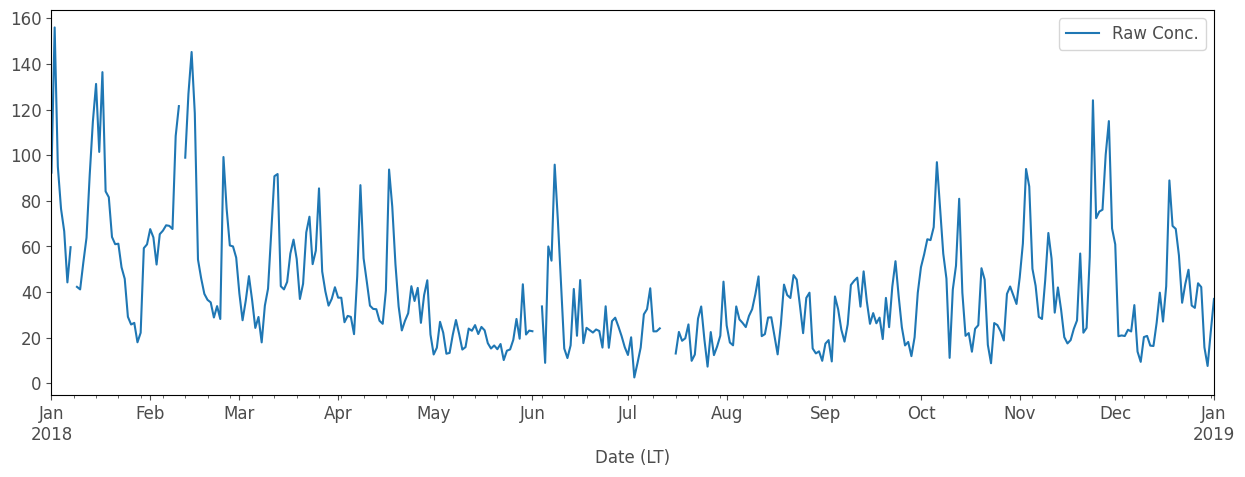

In [ ]:
# a daily average could make the graph less messy
df2[['Raw Conc.']].resample('1D').mean().plot(figsize=(15,5), kind='line')

**Operations**

one line of code above essentially performed three things:
1. Reduced dimension from 5 columns to one column (in addition to the index column) by `df2[['Raw Conc.']]` (the double square brackets are key here)
2. Grouped `Raw Conc.` by an interval of one day in `resample('1D')`, change `1D` to `10D`, or `30D` adjusts the interval
3. Calculated `mean()` of aggregated data, other function such as `std()` works as well
4. finally, plotting


**Interpretation**
- PM<sub>2.5</sub> or particulate mattters that has a diameter of 2.5 micrometer or less is one of outdoor pollutant regulated
- depend on the country, the standard (or recommendation) of daily concentration is different
- The recommendation of WHO is [25 &mu;g/m<sup>3</sup>](https://apps.who.int/iris/bitstream/handle/10665/69477/WHO_SDE_PHE_OEH_06.02_eng.pdf) daily average, [35 &mu;g/m<sup>3</sup>](https://www.epa.gov/pm-pollution/2006-national-ambient-air-quality-standards-naaqs-particulate-matter-pm25) by US EPA, and [50 &mu;g/m<sup>3</sup>](https://www.env.go.jp/air/tech/ine/asia/vietnam/files/law/QCVN%2005-2013.pdf) by Vietname Environmental Administration


<Axes: title={'center': 'QC Tags (Name)'}, ylabel='Raw Conc.'>

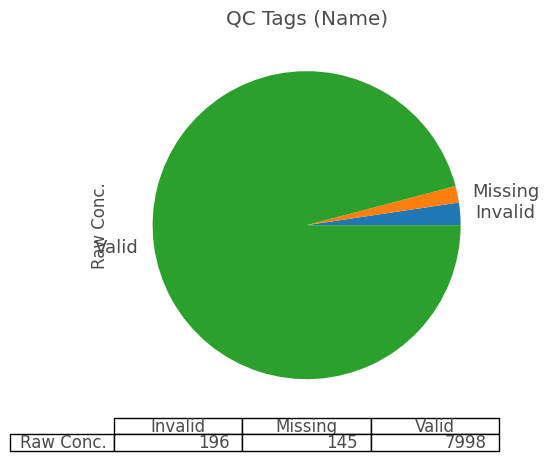

In [ ]:
# before moving on the make the graph more useful, let look as the Quality Control (QC) of the raw data
# for environmnetal data, a valid QC (about 98%) is solid
df.groupby('QC Name')['Raw Conc.'].count().plot.pie(title='QC Tags (Name)',table=True, fontsize=13)

this one line of code performs three primary operations as one:
1. Group all values in `QC Name` columns (`df.groupby('QC Name')` into category
2. Filter by one column `Raw Conc.` to reduce the DataFrame (matrix mxn) to series (two columns x rows)
3. `count()` the value of each tag (`Valid`, `Missing`, `Invalid`, `Suspect` (not in here but you may found with other files)
4. Call `plot` to display to count of each instances

In [ ]:
# let save clean file back to local drive
df2.to_csv('./data/cleaned_Hanoi_PM2.5_2018_YTD.csv')

# Advance visualization with matplotlib and seaborn

- `pandas` is a powerful library to process data, with some handy plot tools. `pandas` is a good choice for data exploration
- `matplotlib` is a proper tool for visualization. `pandas` "borrows" some plotting functions from matplotlib

## line plots

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (15,5)
plt.rcParams['font.sans-serif'] = 'Open Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size']=12

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-462118057.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$')


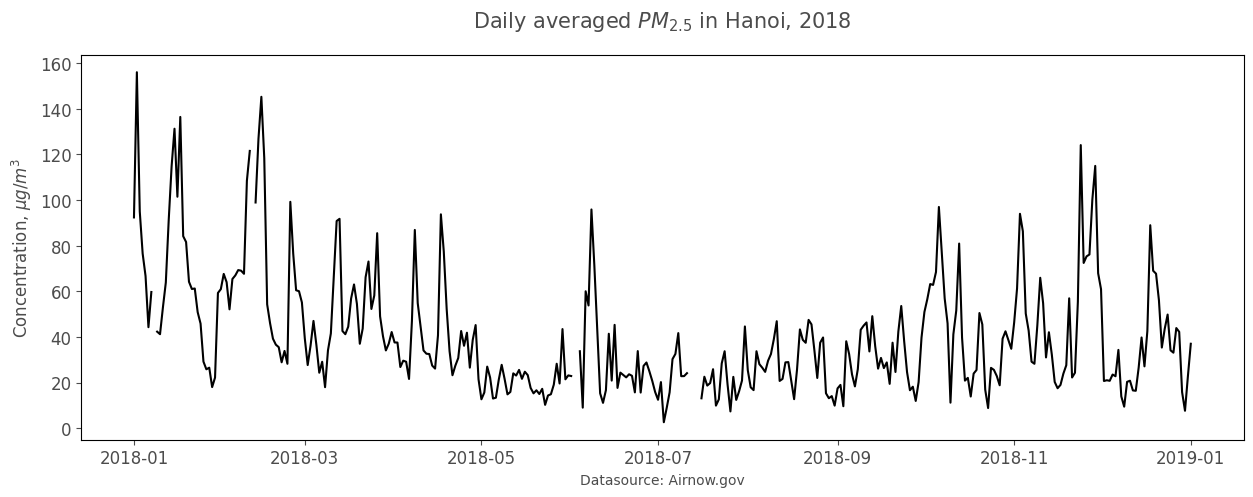

In [ ]:
# recreate a plot from above
# with title and label
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')
plt.xlabel('Datasource: Airnow.gov', fontsize=10)
dft = df2[['Raw Conc.']].resample('1D').mean()
# change the line color, thickness
plt.plot(dft, color='black', linewidth=1.5)
# savefile to local
plt.savefig('img/2020Jul_hanoi.png')

In [ ]:
# check to see if the image is actullay there
! ls ./img

2020Aug-AER.png			   2020Jul_corr_pm25.png
2020Aug-AER-subplot.png		   2020Jul_hanoi.png
2020Aug-corr-heatmap.png	   2020Jul_mixing_feb.png
2020Aug-FLX.png			   2020Jul-peakhours.png
2020Aug-FLX-subplot.png		   2020Jul-pm25.png
2020Aug-PM25-allin.png		   2020Jul-pm25-time.png
2020Aug-PM25-selected.png	   2020Jul_pm25_time.png
2020Aug_rmse_raw.png		   2020Jul_subplot_windrose.png
2020Aug_rmse_rsd.png		   2020Jul-weeks.png
2020Aug-slv-category.png	   2020Jul_windrose_noibai_hadong.png
2020Aug-SLV-PM25.png		   airmonitors_location.png
2020Aug-SLV-subplot.png		   chen_pm25_meteo.png
2020Aug-Temp-sources.png	   en_reg_326.png
2020Aug_wind_corr_heights_inc.png  en_reg_959.png
2020Aug_wind_corr_heights.png	   height.vs.pressure.png
2020Au-SLV-PM25.png		   nasa_approved_app.png
2020Jul_all_params.png		   sc_interactive_mode.png
2020Jul-AQI.png			   screen_forecast.png
2020Jul_corr_method.png		   windspeed-diagram.png


In [ ]:
# recreate this graph by seaborn
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)

<Axes: xlabel='Date (LT)'>

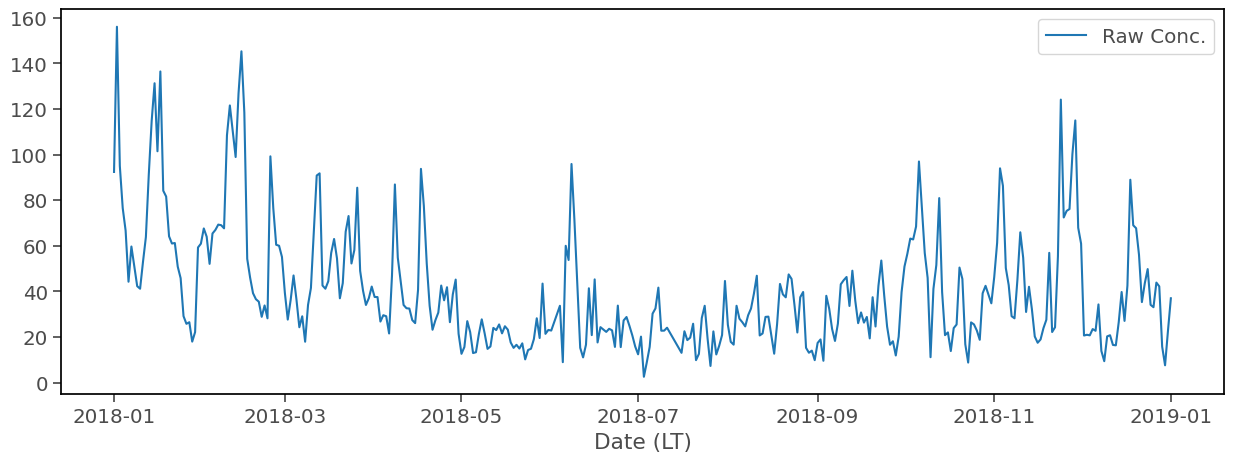

In [ ]:
# minimal setup, and the axes and font look really nice already
sns.lineplot(data=dft)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1938101682.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$')


Text(0, 0.5, 'Concentration, $\\mu g/m^3$')

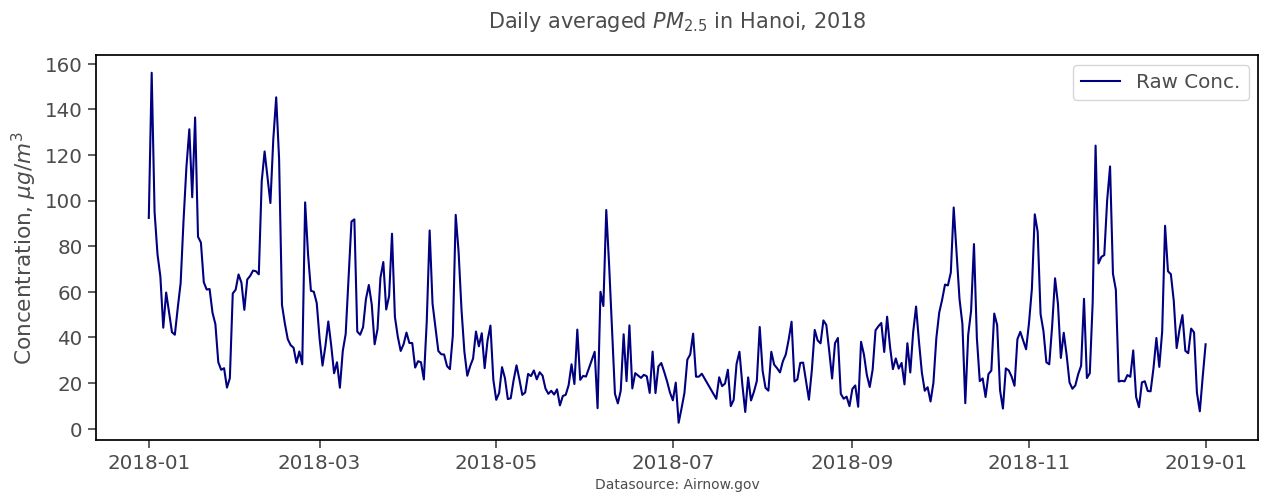

In [ ]:
# of course, you can combine both flexiblity of matplotlib and the nice setup of seaborn
ax = sns.lineplot(data=dft, palette = ['navy'])
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')
# ax.

- lineplot is the most simple one (beside scatter), for this setup, seaborn has not demonstrated its advantages,
-

In [ ]:
colors = ['purple',  'red', 'orange', 'yellow', 'green']

In [ ]:
orders = ['Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Moderate', 'Good']

In [ ]:
colormap = dict(zip(orders, colors))
colormap

{'Very Unhealthy': 'purple',
 'Unhealthy': 'red',
 'Unhealthy for Sensitive Groups': 'orange',
 'Moderate': 'yellow',
 'Good': 'green'}

In [ ]:
df2['AQI Category'].value_counts()

,count
AQI Category,
Moderate,3730
Unhealthy for Sensitive Groups,1847
Unhealthy,1611
Good,684
Very Unhealthy,82


<Axes: xlabel='Date (LT)', ylabel='Raw Conc.'>

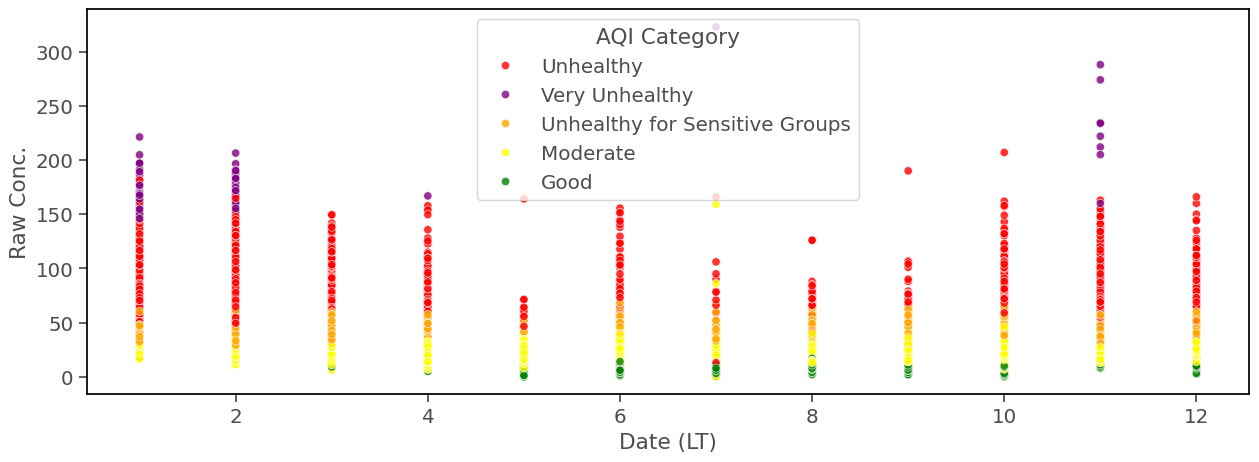

In [ ]:
sns.scatterplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'],
                hue='AQI Category', palette=colormap, alpha=0.8)

- notice that there are some overlap between `AQI Category` and `Raw Conc.`
- this is because AQI calculated from `NowCast Conc.`, and `NowCast Conc.` is a predicting value of daily concentration by calculating the last twelve hourly values of `Raw Conc.`

In [ ]:
df2.head()

,NowCast Conc.,AQI,AQI Category,Raw Conc.,QC Name
Date (LT),,,,,
2018-01-01 01:00:00,68.9,158,Unhealthy,69.2,Valid
2018-01-01 02:00:00,72.2,160,Unhealthy,75.5,Valid
2018-01-01 03:00:00,81.2,164,Unhealthy,90.2,Valid
2018-01-01 04:00:00,89.4,169,Unhealthy,97.6,Valid
2018-01-01 05:00:00,89.2,168,Unhealthy,89.1,Valid


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2879176920.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$');


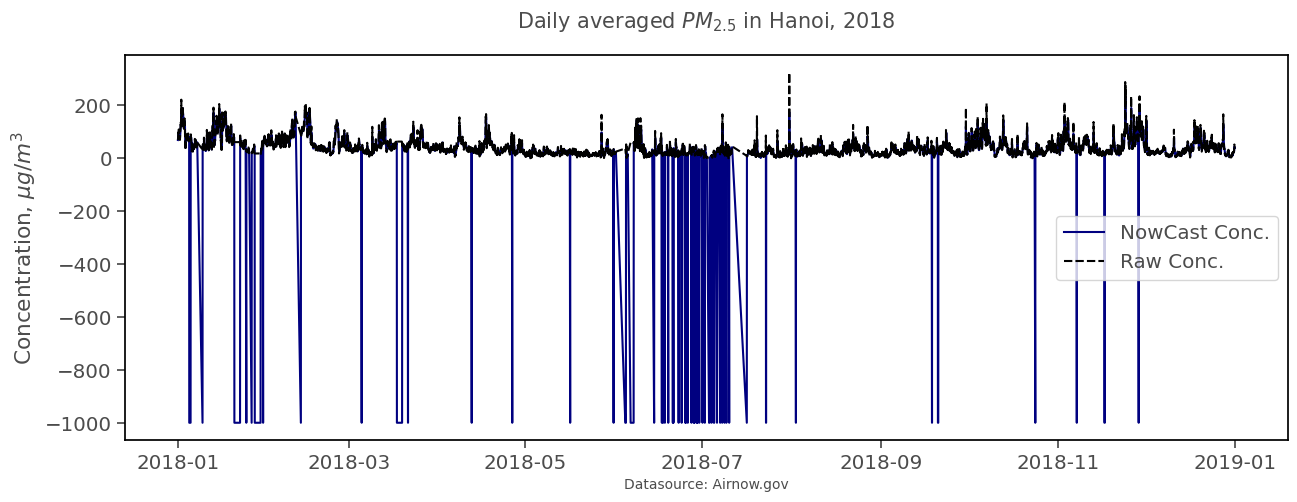

In [ ]:
# let see how the Raw and NowCast Concentration look on graph
# of course, you can combine both flexiblity of matplotlib and the nice setup of seaborn
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['navy', 'black'])
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

In [ ]:
# this is not great, messy instead, let replace a NULL value with -999s error code in NowCast Conc.
df2.loc[df2['NowCast Conc.'] < 0, 'NowCast Conc.'] = None

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2840503292.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$')


Text(0, 0.5, 'Concentration, $\\mu g/m^3$')

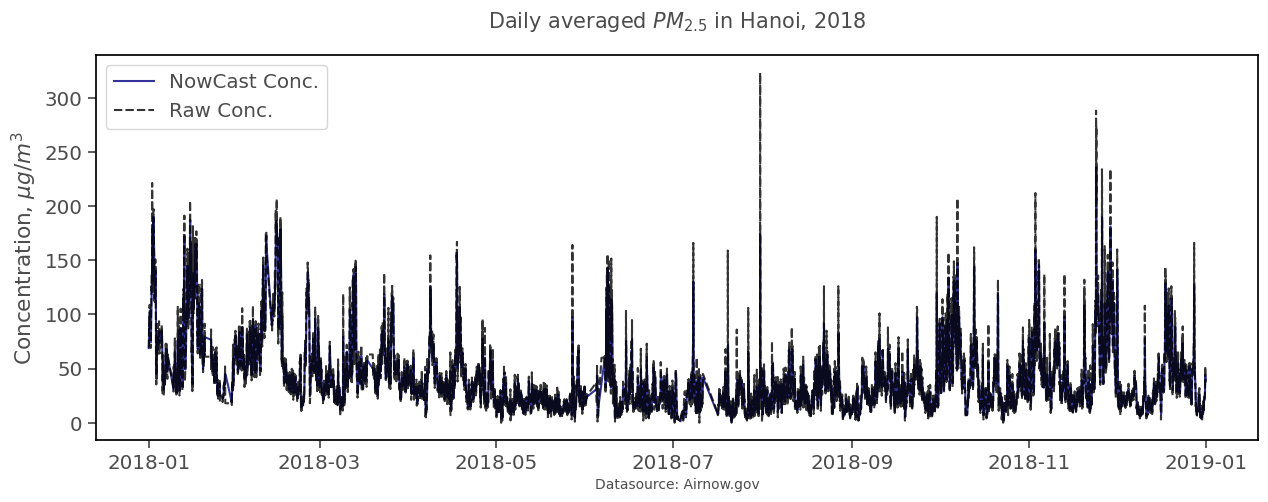

In [ ]:
# this is not great either, but the minus values are filtered out
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['navy', 'black'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi, 2018', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')

In [ ]:
# so let zoom in a few instances, first let set up the limits
from datetime import datetime as dt

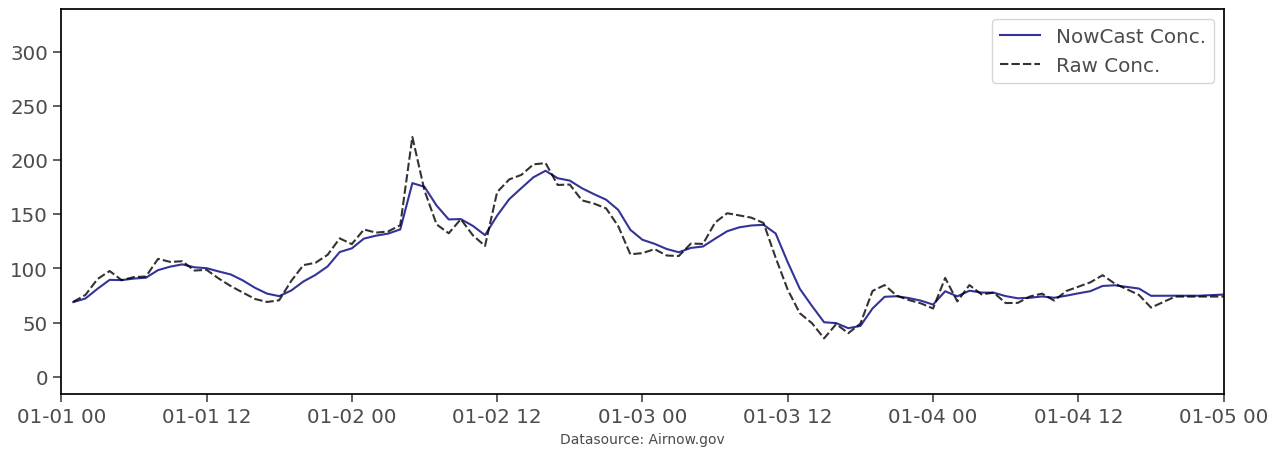

In [ ]:
left = dt(2018,1,1)
right = dt(2018,1,5)
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['navy', 'black'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
ax.set_xlim(left, right);

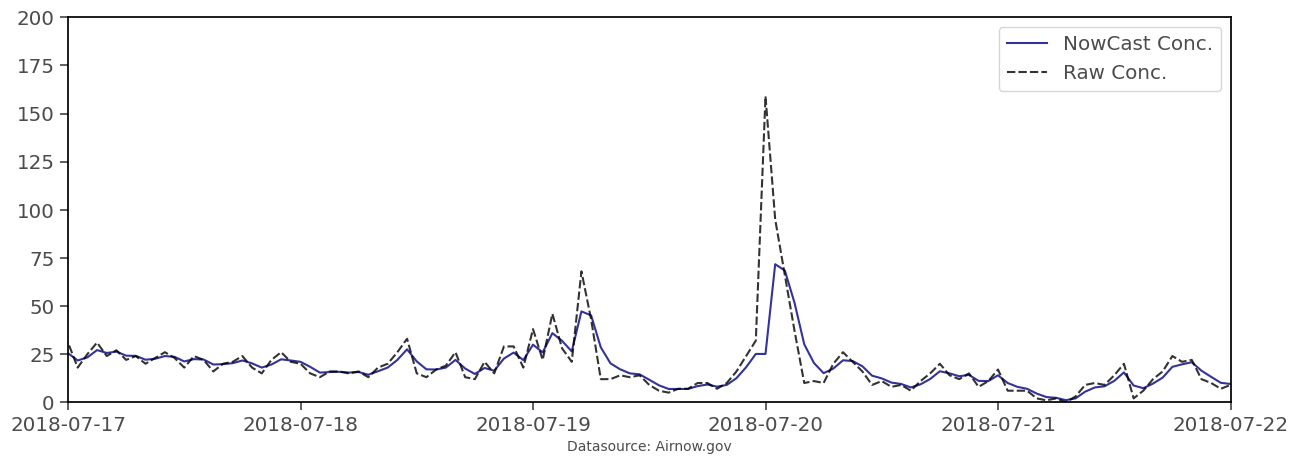

In [ ]:
left = dt(2018,7,17)
right = dt(2018,7,22)
ax = sns.lineplot(data=df2[['NowCast Conc.', 'Raw Conc.']], palette = ['navy', 'black'], alpha=0.8)
ax.set_xlabel('Datasource: Airnow.gov', fontsize=10)
ax.set_xlim(left, right)
ax.set_ylim(0,200);

- NowCast Conc. is similar to the moving average that it smooths out the peak and present a more likely value for a longer period (day)

/tmp/ipython-input-665857707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'], width=0.5, palette=['white'])
/tmp/ipython-input-665857707.py:2: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'], width=0.5, palette=['white'])


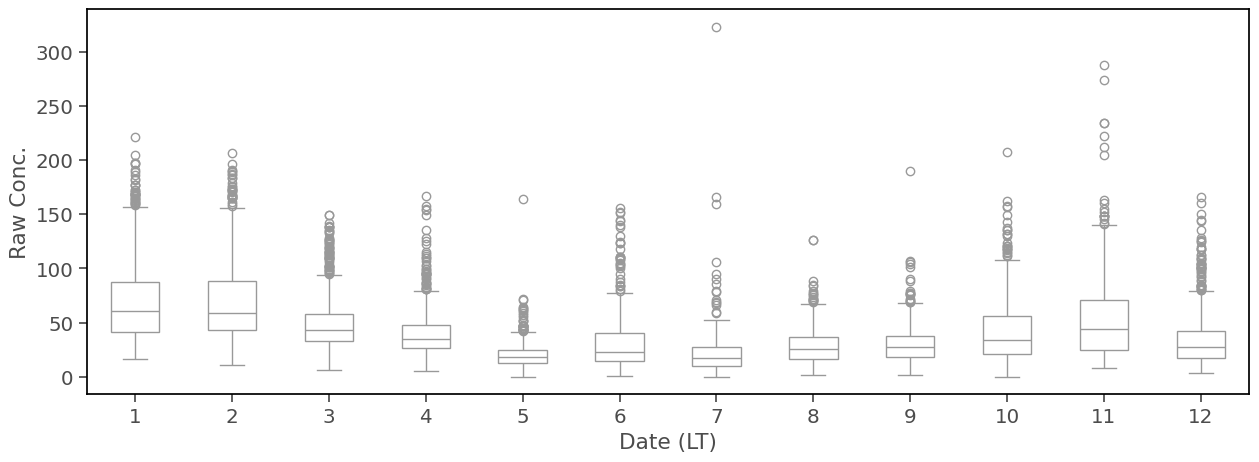

In [ ]:
# if we want to have statistics look, the boxplot is a good place start
ax = sns.boxplot(data=df2, x=df2.index.month, y=df2['Raw Conc.'], width=0.5, palette=['white'])
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

In [ ]:
# let comeback to the dft, or a daily average

In [ ]:
dft2 = df2[['Raw Conc.']].resample('1D')

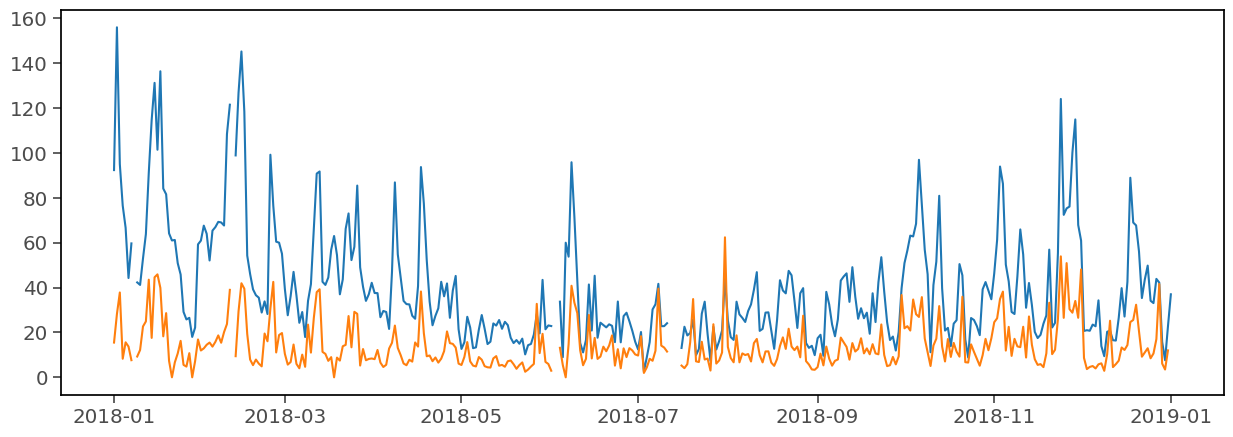

In [ ]:
# this is not really informed, the standard deviation (std) should be presented by a band
plt.plot(dft)
plt.plot(dft2.std())

In [ ]:
std = dft2.std()
std.head()

,Raw Conc.
Date (LT),
2018-01-01,15.487127
2018-01-02,28.224719
2018-01-03,37.818703
2018-01-04,8.274930
2018-01-05,15.594304


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-263263416.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$');


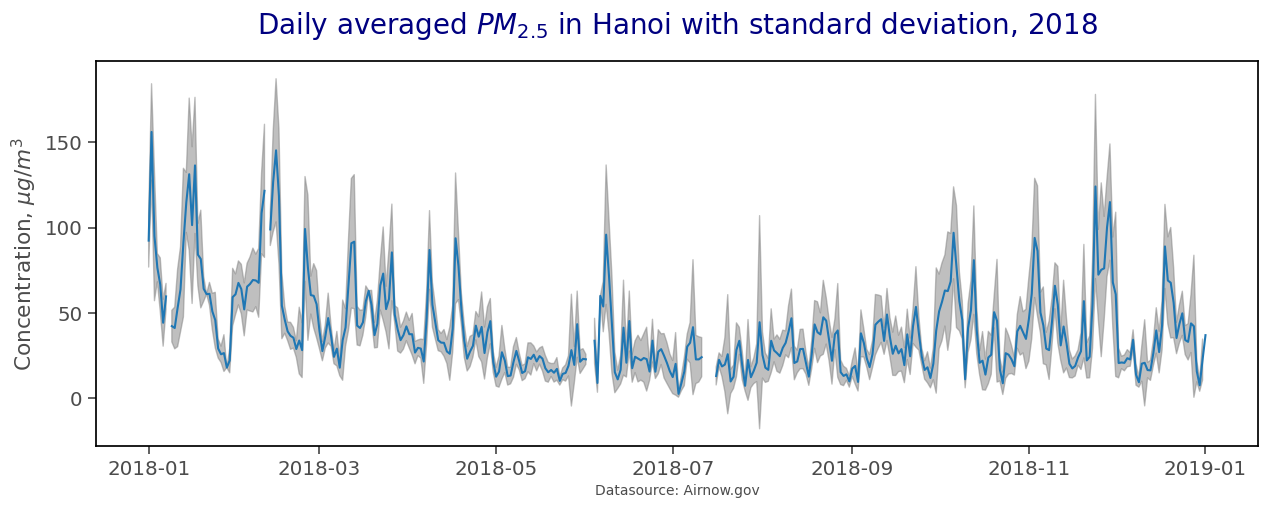

In [ ]:
# dft[dft.columns[0]] select the first column in the dataframe, alternatively, dft['Raw Conc.']
plt.fill_between(std.index,
                 dft[dft.columns[0]] - std[std.columns[0]],
                 dft[dft.columns[0]] + std[std.columns[0]],
                 color='gray',
                 alpha=0.5)
plt.plot(dft.index, dft.values)
plt.xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi with standard deviation, 2018',
          color='navy',
          fontsize=20, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-37409506.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Concentration, $\mu g/m^3$');


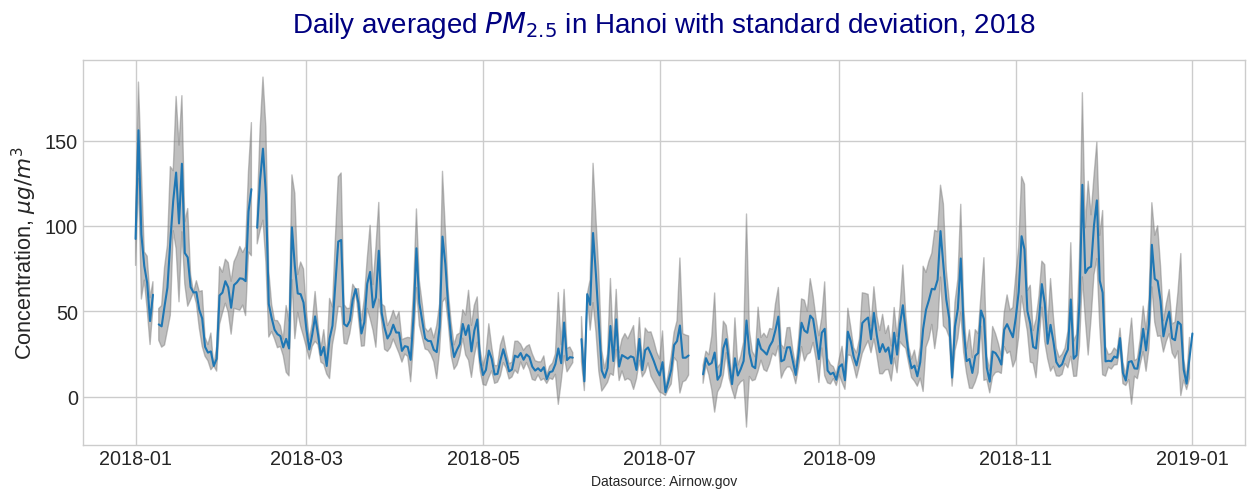

In [ ]:
# use a setup style
plt.style.use('seaborn-v0_8-whitegrid')
plt.fill_between(std.index,
                 dft[dft.columns[0]] - std[std.columns[0]],
                 dft[dft.columns[0]] + std[std.columns[0]],
                 color='gray',
                 alpha=0.5)
plt.plot(dft.index, dft.values)
plt.xlabel('Datasource: Airnow.gov', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in Hanoi with standard deviation, 2018',
          color='navy',
          fontsize=20, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

## analyze by AQI levels

- group by AQI label

In [ ]:
print(df2.shape)
dfv = df2[df2['QC Name'] == 'Valid']
print(dfv.shape)

(8190, 5)
(7997, 5)


In [ ]:
for_pie = dfv['AQI Category'].value_counts()
type(for_pie)
for_pie


,count
AQI Category,
Moderate,3727
Unhealthy for Sensitive Groups,1843
Unhealthy,1603
Good,684
Very Unhealthy,82


In [ ]:
list(for_pie.index)

['Moderate',
 'Unhealthy for Sensitive Groups',
 'Unhealthy',
 'Good',
 'Very Unhealthy']

In [ ]:
colormap

{'Very Unhealthy': 'purple',
 'Unhealthy': 'red',
 'Unhealthy for Sensitive Groups': 'orange',
 'Moderate': 'yellow',
 'Good': 'green'}

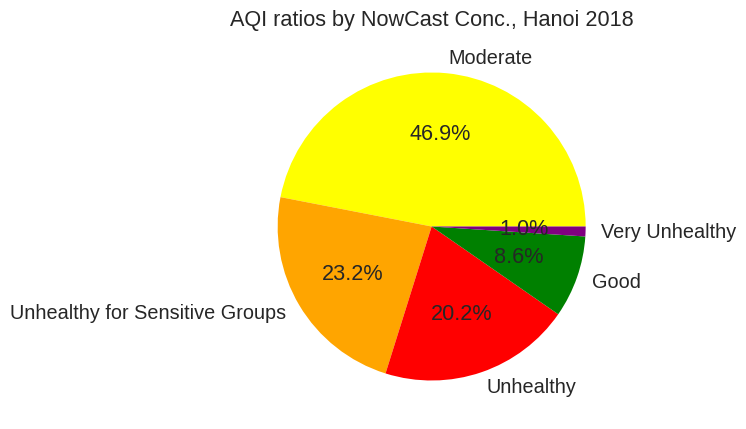

In [ ]:
plt.pie(for_pie,
        labels=list(for_pie.index),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%');
plt.title('AQI ratios by NowCast Conc., Hanoi 2018');

- ref comprehensive for pie: https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/

In [ ]:
dft.head()

,Raw Conc.
Date (LT),
2018-01-01,92.373913
2018-01-02,156.020833
2018-01-03,94.995833
2018-01-04,76.527273
2018-01-05,66.666667


In [ ]:
# a dictionary for PM2.5 category
aqi = {
    'Good':{'pm2.5': [0, 12], 'color': 'green'},
    'Moderate': {'pm2.5': [12.1, 35.4], 'color': 'yellow'},
    'Unhealthy for Sensitive Groups':{'pm2.5': [35.5, 55,4], 'color': 'orange'},
    'Unhealthy': {'pm2.5': [55.5, 150.4], 'color': 'red'},
    'Very Unhealthy': {'pm2.5': [150.5, 250.5], 'color': 'purple'},
    'Hazardous': {'pm2.5': [250.5, 500.4], 'color': 'maroon'}}

In [ ]:
bins = [x['pm2.5'][0] for x in list(aqi.values())]

In [ ]:
bins.append(aqi['Hazardous']['pm2.5'][-1])

In [ ]:
bins

[0, 12.1, 35.5, 55.5, 150.5, 250.5, 500.4]

In [ ]:
dfvc = dfv[['Raw Conc.']]

In [ ]:
for_pie2 = pd.cut(dfvc['Raw Conc.'], bins=bins, labels= list(aqi.keys()), include_lowest=True).value_counts()

In [ ]:
for_pie3 = pd.cut(dft['Raw Conc.'], bins=bins, labels= list(aqi.keys()), include_lowest=True).value_counts()

In [ ]:
for_pie3

,count
Raw Conc.,
Moderate,177
Unhealthy for Sensitive Groups,91
Unhealthy,75
Good,14
Very Unhealthy,1
Hazardous,0


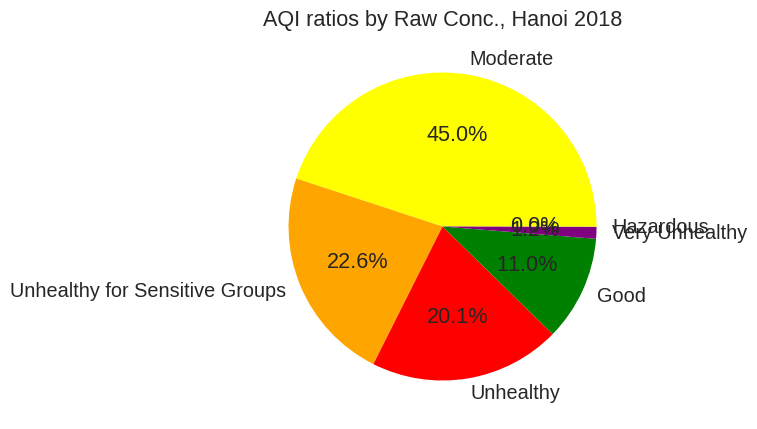

In [ ]:
# notice that the color is messed up, we will fix by the end
plt.pie(for_pie2,
        labels=list(for_pie2.index),
        colors=['yellow', 'orange', 'red', 'green', 'purple'], autopct='%1.1f%%');
plt.title('AQI ratios by Raw Conc., Hanoi 2018');

In [ ]:
# let combine three pies in one plate
all_pies = pd.concat([for_pie, for_pie2, for_pie3], axis=1)
all_pies.columns = ['NowCast,h', 'Raw,h', 'Raw,d']
all_pies = all_pies.reindex(aqi.keys())
all_pies

,"NowCast,h","Raw,h","Raw,d"
Good,684.0,883,14
Moderate,3727.0,3595,177
Unhealthy for Sensitive Groups,1843.0,1810,91
Unhealthy,1603.0,1607,75
Very Unhealthy,82.0,99,1
Hazardous,NaN,3,0


In [ ]:
# drop the last column, otherwise the percetage will not work
all_pies.drop(labels='Hazardous', inplace=True)

In [ ]:
colors = [x['color'] for x in aqi.values()]
colors

['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

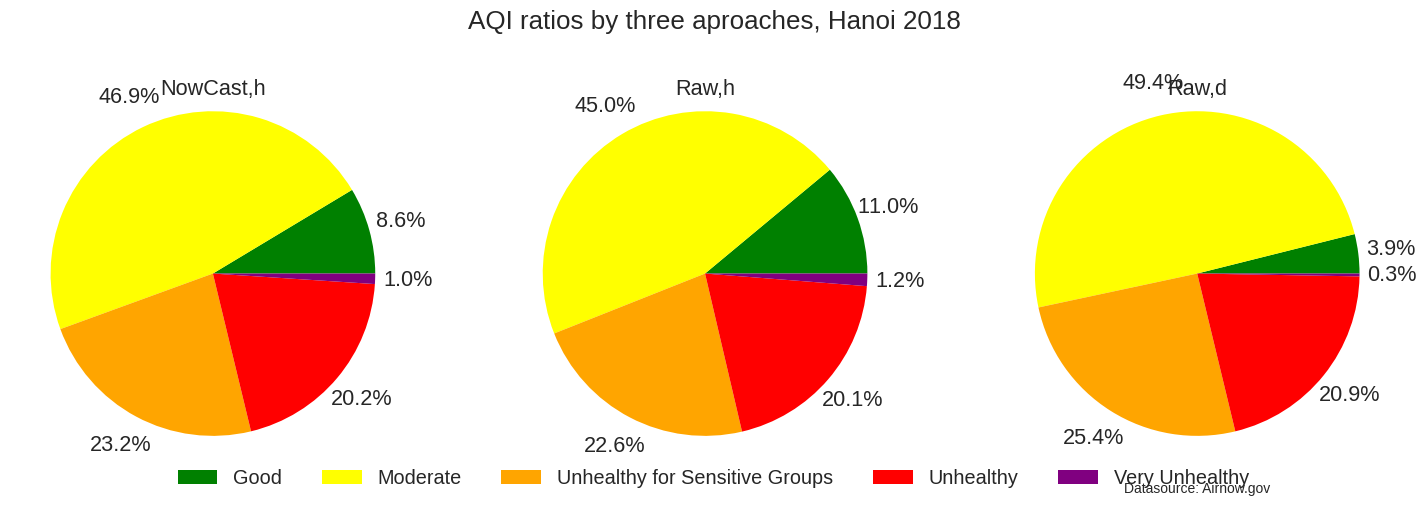

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
for i, col in enumerate(all_pies.columns):
    axes[i].pie(all_pies[col],
            colors=colors, autopct='%1.1f%%', pctdistance=1.2)
    axes[i].set_title(col, y=0.92)
fig.legend(list(all_pies.index), ncol=6, loc='lower center')
fig.suptitle('AQI ratios by three aproaches, Hanoi 2018')
axes[2].set_xlabel('Datasource: Airnow.gov', fontsize=10)
fig.tight_layout()
fig.savefig('img/2020Jul-AQI.png', dpi=120)

# Concluding notes
- Python, `pandas`, `matplotlib`, `seaborn` are more approachable to work with data (than we presume)
- `pandas` is capable of performs several operations in one line easierly, give you a high level of summary
- `matplotlib` with `seaborn` gives you options to be flexible or a quick setup